Importing the Libraries

In [3]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from ucimlrepo import fetch_ucirepo

Loading The Dataset

In [ ]:
pip install ucimlrepo

In [ ]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
optical_recognition_of_handwritten_digits = fetch_ucirepo(id=80)

# data (as pandas dataframes)
X = optical_recognition_of_handwritten_digits.data.features
y = optical_recognition_of_handwritten_digits.data.targets

# metadata
print(optical_recognition_of_handwritten_digits.metadata)

# variable information
print(optical_recognition_of_handwritten_digits.variables)


{'uci_id': 80, 'name': 'Optical Recognition of Handwritten Digits', 'repository_url': 'https://archive.ics.uci.edu/dataset/80/optical+recognition+of+handwritten+digits', 'data_url': 'https://archive.ics.uci.edu/static/public/80/data.csv', 'abstract': 'Two versions of this database available; see folder', 'area': 'Computer Science', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 5620, 'num_features': 64, 'feature_types': ['Integer'], 'demographics': [], 'target_col': ['class'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 1998, 'last_updated': 'Wed Aug 23 2023', 'dataset_doi': '10.24432/C50P49', 'creators': ['E. Alpaydin', 'C. Kaynak'], 'intro_paper': {'title': 'Methods of Combining Multiple Classifiers and Their Applications to Handwritten Digit Recognition', 'authors': 'C. Kaynak', 'published_in': 'MSc Thesis, Institute of Graduate Studies in Science and Engineering, Bogazici University', 

Data Preperation (Scaling)

In [4]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Reshape data for CNN input
# Assuming each image is 8x8 pixels and 1 channel (grayscale)
X_reshaped = X_scaled.reshape(-1, 8, 8, 1)

# Convert labels to one-hot encoding
y_categorical = to_categorical(y)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_reshaped, y_categorical, test_size=0.2, random_state=42)

In [6]:
# Convert X_train and X_test from 4D arrays back to 2D arrays for table display
X_train_flat = X_train.reshape(X_train.shape[0], -1)  # Reshape to (number of samples, 64)
X_test_flat = X_test.reshape(X_test.shape[0], -1)     # Reshape to (number of samples, 64)

# Create pandas DataFrames
train_df = pd.DataFrame(X_train_flat, columns=[f"Pixel_{i}" for i in range(64)])
test_df = pd.DataFrame(X_test_flat, columns=[f"Pixel_{i}" for i in range(64)])

# Display the first few rows of each DataFrame
print("Training Data:")
# print(train_df.head())
print("\nTesting Data:")
# print(test_df.head())

Training Data:
   Pixel_0   Pixel_1   Pixel_2   Pixel_3   Pixel_4   Pixel_5   Pixel_6  \
0      0.0 -0.343381 -1.154300 -2.541486  0.766830 -0.105454 -0.410972   
1      0.0 -0.343381 -1.154300 -0.426612 -0.353707 -0.993451 -0.410972   
2      0.0 -0.343381 -1.154300 -0.426612 -0.353707 -0.993451 -0.410972   
3      0.0 -0.343381 -1.154300 -2.306500  0.766830 -0.105454 -0.410972   
4      0.0 -0.343381 -0.726245 -0.426612 -1.026028 -0.993451 -0.410972   

    Pixel_7   Pixel_8   Pixel_9  ...  Pixel_54  Pixel_55  Pixel_56  Pixel_57  \
0 -0.132062 -0.035424 -0.636162  ... -0.761830 -0.197899 -0.018868 -0.303102   
1 -0.132062 -0.035424 -0.636162  ... -0.761830 -0.197899 -0.018868 -0.303102   
2 -0.132062 -0.035424 -0.636162  ... -0.761830 -0.197899 -0.018868 -0.303102   
3 -0.132062 -0.035424 -0.636162  ... -0.761830 -0.197899 -0.018868 -0.303102   
4 -0.132062 -0.035424  0.332036  ...  1.072481 -0.197899 -0.018868 -0.303102   

   Pixel_58  Pixel_59  Pixel_60  Pixel_61  Pixel_62  Pixel_

In [7]:
train_df.head()

,Pixel_0,Pixel_1,Pixel_2,Pixel_3,Pixel_4,Pixel_5,Pixel_6,Pixel_7,Pixel_8,Pixel_9,...,Pixel_54,Pixel_55,Pixel_56,Pixel_57,Pixel_58,Pixel_59,Pixel_60,Pixel_61,Pixel_62,Pixel_63
0,0.0,-0.343381,-1.154300,-2.541486,0.766830,-0.105454,-0.410972,-0.132062,-0.035424,-0.636162,...,-0.761830,-0.197899,-0.018868,-0.303102,-1.147350,-2.528016,0.889924,-0.295925,-0.517244,-0.179136
1,0.0,-0.343381,-1.154300,-0.426612,-0.353707,-0.993451,-0.410972,-0.132062,-0.035424,-0.636162,...,-0.761830,-0.197899,-0.018868,-0.303102,-1.147350,0.232410,-1.522023,-1.155764,-0.517244,-0.179136
2,0.0,-0.343381,-1.154300,-0.426612,-0.353707,-0.993451,-0.410972,-0.132062,-0.035424,-0.636162,...,-0.761830,-0.197899,-0.018868,-0.303102,-1.147350,0.232410,-0.517045,-1.155764,-0.517244,-0.179136
3,0.0,-0.343381,-1.154300,-2.306500,0.766830,-0.105454,-0.410972,-0.132062,-0.035424,-0.636162,...,-0.761830,-0.197899,-0.018868,-0.303102,-1.147350,-2.528016,0.688929,-0.639861,-0.517244,-0.179136
4,0.0,-0.343381,-0.726245,-0.426612,-1.026028,-0.993451,-0.410972,-0.132062,-0.035424,0.332036,...,1.072481,-0.197899,-0.018868,-0.303102,-0.549824,-0.227661,-0.718041,0.219978,0.470997,-0.179136


In [8]:
test_df.head()

,Pixel_0,Pixel_1,Pixel_2,Pixel_3,Pixel_4,Pixel_5,Pixel_6,Pixel_7,Pixel_8,Pixel_9,...,Pixel_54,Pixel_55,Pixel_56,Pixel_57,Pixel_58,Pixel_59,Pixel_60,Pixel_61,Pixel_62,Pixel_63
0,0.0,-0.343381,0.129863,0.983303,0.990937,0.604944,-0.410972,-0.132062,-0.035424,-0.636162,...,-0.761830,-0.197899,-0.018868,-0.303102,0.246878,-0.917768,-2.326006,-1.155764,-0.517244,-0.179136
1,0.0,-0.343381,-0.726245,0.278345,0.766830,0.072146,-0.410972,-0.132062,-0.035424,-0.636162,...,-0.761830,-0.197899,-0.018868,-0.303102,-0.549824,0.692481,0.085942,-0.983796,-0.517244,-0.179136
2,0.0,-0.343381,0.343891,0.278345,0.990937,0.604944,-0.410972,-0.132062,-0.035424,-0.636162,...,-0.761830,-0.197899,-0.018868,-0.303102,0.844405,-0.457697,-1.924015,-1.155764,-0.517244,-0.179136
3,0.0,-0.343381,0.343891,0.748317,-1.250136,-0.993451,-0.410972,-0.132062,-0.035424,-0.313430,...,2.091543,3.359219,-0.018868,-0.303102,0.047703,0.002374,-0.718041,0.219978,1.459237,1.935875
4,0.0,-0.343381,0.129863,0.983303,0.094508,-0.815851,-0.410972,-0.132062,-0.035424,-0.636162,...,2.499168,11.659159,-0.018868,-0.303102,-0.151473,0.922516,-0.115054,0.391946,0.965117,1.230871


CNN Model

In [10]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Define the CNN model
model = Sequential([
    # First Convolutional Layer
    Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(8, 8, 1), padding='same'),

    # Second Convolutional Layer (optional pooling)
    Conv2D(64, (3, 3), activation='relu', padding='same'),
    MaxPooling2D(pool_size=(2, 2)),  # Reduce dimension to 4x4

    # Third Convolutional Layer
    Conv2D(128, (3, 3), activation='relu', padding='same'),  # Using padding to maintain dimension

    # Optional: Adding pooling here if additional dimension reduction is needed (to 2x2)
    # MaxPooling2D(pool_size=(2, 2)),

    # Flattening the outputs from the convolutional layers to feed into a dense layer
    Flatten(),

    # Dense Layer
    Dense(128, activation='relu'),
    Dropout(0.5),

    # Output Layer
    Dense(10, activation='softmax')  # 10 classes for the digits 0-9
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Print model summary to review the architecture
model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 8, 8, 32)          320       
                                                                 
 conv2d_4 (Conv2D)           (None, 8, 8, 64)          18496     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 4, 4, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 4, 4, 128)         73856     
                                                                 
 flatten_1 (Flatten)         (None, 2048)              0         
                                                                 
 dense_2 (Dense)             (None, 128)               262272    
                                                      

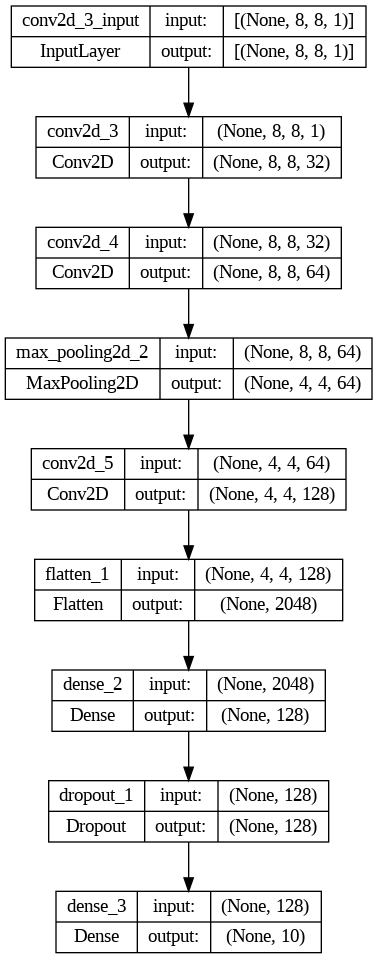

In [11]:
from tensorflow.keras.utils import plot_model

# Generate a plot of the model
plot_model(model, to_file='model_architecture.png', show_shapes=True, show_layer_names=True)


Training the CNN Model

In [12]:
# Train the model
model.fit(X_train, y_train, epochs=10, validation_split=0.1, batch_size=32)

# Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_accuracy*100:.2f}%")


Epoch 1/10
127/127 [==============================] - 6s 34ms/step - loss: 0.6558 - accuracy: 0.7961 - val_loss: 0.0898 - val_accuracy: 0.9778
Epoch 2/10
127/127 [==============================] - 3s 22ms/step - loss: 0.1534 - accuracy: 0.9543 - val_loss: 0.0437 - val_accuracy: 0.9911
Epoch 3/10
127/127 [==============================] - 3s 21ms/step - loss: 0.0888 - accuracy: 0.9750 - val_loss: 0.0249 - val_accuracy: 0.9933
Epoch 4/10
127/127 [==============================] - 3s 21ms/step - loss: 0.0555 - accuracy: 0.9827 - val_loss: 0.0251 - val_accuracy: 0.9889
Epoch 5/10
127/127 [==============================] - 3s 27ms/step - loss: 0.0490 - accuracy: 0.9859 - val_loss: 0.0164 - val_accuracy: 0.9956
Epoch 6/10
127/127 [==============================] - 3s 25ms/step - loss: 0.0275 - accuracy: 0.9921 - val_loss: 0.0129 - val_accuracy: 0.9933
Epoch 7/10
127/127 [==============================] - 3s 21ms/step - loss: 0.0261 - accuracy: 0.9918 - val_loss: 0.0146 - val_accuracy: 0.9933

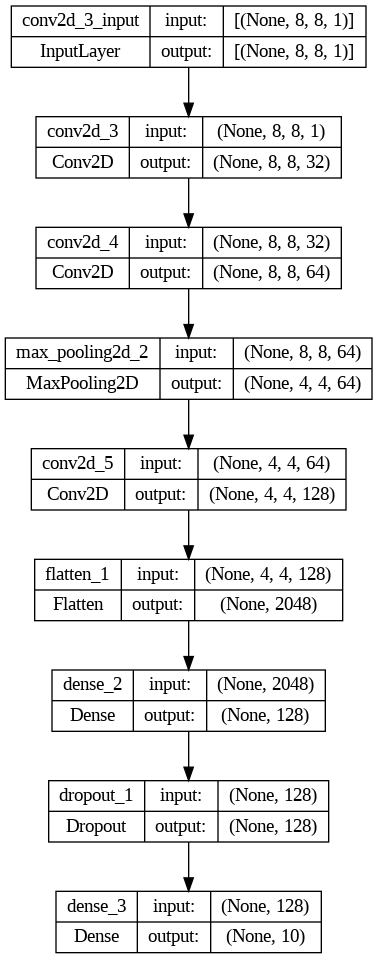

In [13]:
from tensorflow.keras.utils import plot_model

# Assuming your model is named 'model'
# Generate a plot of the model
plot_model(model, to_file='model_architecture.png', show_shapes=True, show_layer_names=True, dpi=96)

# Display the image in a Jupyter notebook (if you're using one)
from IPython.display import Image
Image(filename='model_architecture.png')


In [14]:
from tensorflow.keras.models import Model

# Define the model to output feature maps
layer_outputs = [model.layers[1].output,  # Output of the second convolutional layer (before pooling)
                 model.layers[2].output]  # Output of the max pooling layer (after pooling)

feature_map_model = Model(inputs=model.input, outputs=layer_outputs)

# Use this model to predict on a sample input to get the feature maps
feature_maps = feature_map_model.predict(X_train[:1])  # Using the first image in the train set

# Feature maps before pooling
feature_maps_before_pooling = feature_maps[0]
# Feature maps after pooling
feature_maps_after_pooling = feature_maps[1]


1/1 [==============================] - 0s 101ms/step


Pooling the pictures

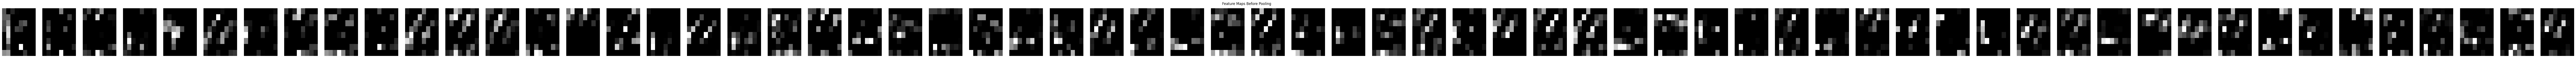

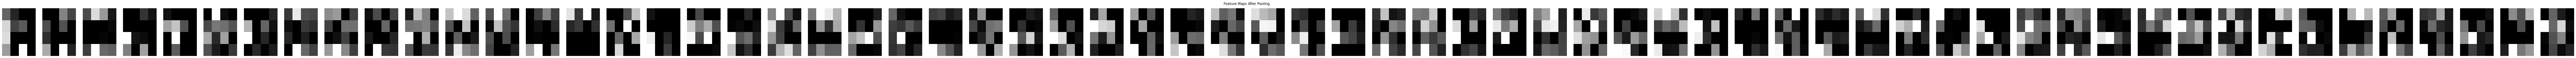

In [16]:
import matplotlib.pyplot as plt

def plot_feature_maps(feature_maps, title):
    num_maps = feature_maps.shape[-1]  # Get the number of feature maps
    fig, axes = plt.subplots(1, num_maps, figsize=(num_maps * 2.5, 3))  # Dynamic sizing of the plot
    fig.suptitle(title)

    if num_maps == 1:  # If there is only one feature map, axes is not an array
        axes = [axes]

    for i, ax in enumerate(axes):
        # Displaying the i-th feature map
        ax.imshow(feature_maps[:, :, :, i].squeeze(), cmap='gray', aspect='auto')
        ax.axis('off')
    plt.show()

# Now using the function to plot the feature maps
# Plot feature maps before and after pooling
plot_feature_maps(feature_maps_before_pooling, "Feature Maps Before Pooling")
plot_feature_maps(feature_maps_after_pooling, "Feature Maps After Pooling")


In [17]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential([
    Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(8, 8, 1), padding='same'),
    Conv2D(64, (3, 3), activation='relu', padding='same'),
    MaxPooling2D(pool_size=(2, 2)),  # Reduce dimension to 4x4
    Conv2D(128, (3, 3), activation='relu', padding='same'),  # Using padding to maintain dimension
    Flatten(),  # Flattening the outputs from the convolutional layers
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')  # Output layer with softmax activation for 10 classes
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 8, 8, 32)          320       
                                                                 
 conv2d_7 (Conv2D)           (None, 8, 8, 64)          18496     
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 4, 4, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_8 (Conv2D)           (None, 4, 4, 128)         73856     
                                                                 
 flatten_2 (Flatten)         (None, 2048)              0         
                                                                 
 dense_4 (Dense)             (None, 128)               262272    
                                                      

Using K-Fold

In [18]:
from sklearn.model_selection import KFold
import numpy as np

# Parameters
num_folds = 5
kfold = KFold(n_splits=num_folds, shuffle=True, random_state=42)

# K-fold Cross Validation model evaluation
fold_no = 1
accuracies = []
losses = []

for train, test in kfold.split(X_reshaped, y_categorical):
    model = Sequential([
        Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(8, 8, 1), padding='same'),
        Conv2D(64, (3, 3), activation='relu', padding='same'),
        MaxPooling2D(pool_size=(2, 2)),
        Conv2D(128, (3, 3), activation='relu', padding='same'),
        Flatten(),
        Dense(128, activation='relu'),
        Dropout(0.5),
        Dense(10, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

    # Train the model
    print(f'Training for fold {fold_no}...')
    history = model.fit(X_reshaped[train], y_categorical[train],
                        batch_size=32, epochs=10, validation_data=(X_reshaped[test], y_categorical[test]))

    # Saving scores
    scores = model.evaluate(X_reshaped[test], y_categorical[test], verbose=0)
    print(f'Score for fold {fold_no}: {model.metrics_names[1]} of {scores[1]*100}%')
    accuracies.append(scores[1])
    losses.append(scores[0])

    fold_no += 1


Training for fold 1...
Epoch 1/10
141/141 [==============================] - 7s 24ms/step - loss: 0.5749 - accuracy: 0.8198 - val_loss: 0.1080 - val_accuracy: 0.9591
Epoch 2/10
141/141 [==============================] - 3s 22ms/step - loss: 0.1366 - accuracy: 0.9600 - val_loss: 0.0788 - val_accuracy: 0.9786
Epoch 3/10
141/141 [==============================] - 4s 32ms/step - loss: 0.0795 - accuracy: 0.9782 - val_loss: 0.0538 - val_accuracy: 0.9831
Epoch 4/10
141/141 [==============================] - 3s 23ms/step - loss: 0.0555 - accuracy: 0.9809 - val_loss: 0.0416 - val_accuracy: 0.9875
Epoch 5/10
141/141 [==============================] - 3s 23ms/step - loss: 0.0394 - accuracy: 0.9884 - val_loss: 0.0485 - val_accuracy: 0.9849
Epoch 6/10
141/141 [==============================] - 3s 23ms/step - loss: 0.0290 - accuracy: 0.9904 - val_loss: 0.0488 - val_accuracy: 0.9831
Epoch 7/10
141/141 [==============================] - 4s 31ms/step - loss: 0.0194 - accuracy: 0.9938 - val_loss: 0.0410

Plotting our Model

Average Accuracy: 99.05694007873535% (+- 0.0028469689190480344)
Average Loss: 0.03708127662539482


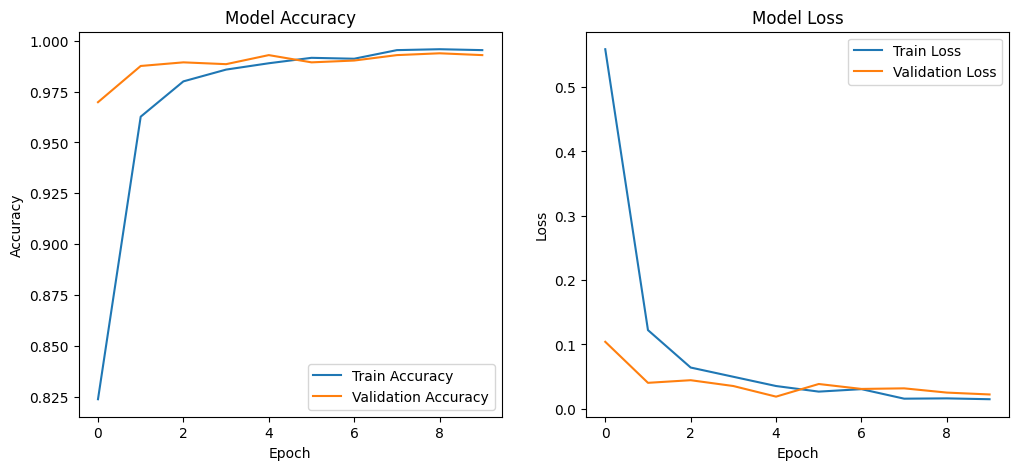

In [19]:
import matplotlib.pyplot as plt

# Average scores
print(f'Average Accuracy: {np.mean(accuracies)*100}% (+- {np.std(accuracies)})')
print(f'Average Loss: {np.mean(losses)}')

# Plotting training history from last fold for simplicity (you might want to average histories)
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()


Plotting the Confusion Matrix

36/36 [==============================] - 1s 11ms/step


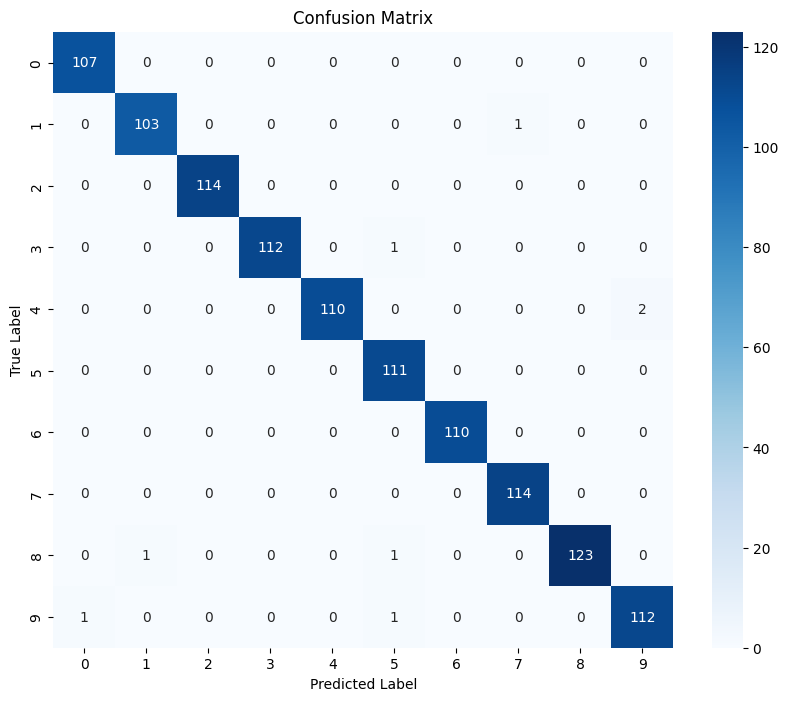

In [20]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Predict the values from the last fold's test data
y_pred = model.predict(X_reshaped[test])
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_categorical[test], axis=1)

# Compute the confusion matrix
cm = confusion_matrix(y_true, y_pred_classes)

# Plotting the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()
